# Task San Fransisco Permit

## Task A Cleaning
- Download the Building_Permits.csv from Kaggle 
- Clean the San Francisco Building permit dataset 
- Use imputation were necessary 


In [1]:
import numpy as np
import pandas as pd

In [2]:
# read in the San Francisco building permits data
sfPermits = pd.read_csv("./Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0)

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sfPermits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


In [4]:
# Calculate total number of cells in dataframe
totalCells = np.product(sfPermits.shape)

# Count number of missing values per column
missingCount = sfPermits.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The SF Permits dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The SF Permits dataset contains 26.26 % missing values.


In [5]:
def getMissingPercent(dataSet):
    sums = dataSet.isnull().sum()
    return (sums/dataSet.shape[0]).sort_values(ascending=False)

missing_percent = getMissingPercent(sfPermits)
missing_percent

TIDF Compliance                           0.999990
Voluntary Soft-Story Retrofit             0.999824
Unit Suffix                               0.990141
Street Number Suffix                      0.988859
Site Permit                               0.973057
Structural Notification                   0.965199
Fire Only Permit                          0.905344
Unit                                      0.851790
Completed Date                            0.511357
Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type                0.218029
Existing Construction Type Description    0.218029
Proposed Construction Type                0.217004
Proposed Construction Type Description    0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                   

## Possible Solutions
- Remove all rows containing NaN values
- Remove all columns containing NaN values
- Fill in the gaps with new data
- Manually clean the dataset

### Solution 1: remove all rows containing NaN values

In [6]:
remRows = sfPermits.dropna()
remRows

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


As you can see, this doesn't make any sense, as there would be no row left which contains data.

### Solution 2: remove all columns containing NaN values

In [7]:
remCols = sfPermits.dropna(axis=1)
remCols.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [8]:
print("Columns in original dataset: %d \n" % sfPermits.shape[1])
print("Columns with na's dropped: %d" % remCols.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


This solution also doesn't make sense, as there would be too few columns left for data exploration.

### Solution 3: fill in the gaps with zeroes

In [9]:
imputeZeroes = sfPermits.fillna(method='ffill', axis=0).fillna("0")
print("Column count after filling the gaps: %d" % imputeZeroes.shape[1])
imputeZeroes.head()

Column count after filling the gaps: 43


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,Geary,St,...,3.0,constr type 3,0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0,Pacific,Av,...,1.0,constr type 1,1,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0,Pacific,Av,...,5.0,wood frame (5),5,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0,Market,St,...,3.0,constr type 3,5,wood frame (5),0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Now we would have no more NaN values left, but the data doesn't make sense anymore, so we should try to fill it with some reliable data.

### Solution 4: manually clean the dataset

In [10]:
#First of all, let's drop all columns with at least 50% missing data

missing_percent.head(10)

TIDF Compliance                  0.999990
Voluntary Soft-Story Retrofit    0.999824
Unit Suffix                      0.990141
Street Number Suffix             0.988859
Site Permit                      0.973057
Structural Notification          0.965199
Fire Only Permit                 0.905344
Unit                             0.851790
Completed Date                   0.511357
Permit Expiration Date           0.260835
dtype: float64

In [11]:
sfPermitsCopy = sfPermits.copy()

def dropColumn(columnName):
    sfPermitsCopy.drop(columnName, axis=1, inplace=True)
    

In [12]:
for i in range(len(missing_percent)):
    if missing_percent[i] > 0.5:
        dropColumn(missing_percent.index[i])
    else:
        break

In [13]:
print("Column count after removing those columns: %d" % sfPermitsCopy.shape[1])

Column count after removing those columns: 34


In [14]:
sfPermitsCopy.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [15]:
print(getMissingPercent(sfPermitsCopy))

Permit Expiration Date                    0.260835
Existing Units                            0.259115
Proposed Units                            0.255963
Existing Construction Type Description    0.218029
Existing Construction Type                0.218029
Proposed Construction Type Description    0.217004
Proposed Construction Type                0.217004
Number of Proposed Stories                0.215525
Number of Existing Stories                0.215103
Proposed Use                              0.213369
Existing Use                              0.206707
Estimated Cost                            0.191383
Plansets                                  0.187577
First Construction Document Date          0.075143
Issued Date                               0.075113
Revised Cost                              0.030498
Street Suffix                             0.013917
Neighborhoods - Analysis Boundaries       0.008673
Supervisor District                       0.008632
Zipcode                        

In [16]:
#There are some more columns we can delete, as they are not important for the model

more_columns_to_delete = ['Existing Construction Type Description', #Just a description
                          'Proposed Construction Type Description', #Also
                          'Location', #Geocoordinates, ZIP code is better usable
                          'Description', #Another description
                          'Permit Type Definition', #Better use the permit type (numerical)
                          'Permit Number', #Just a number without important semantic
                          'Record ID' #Same reason as permit number
                          
                         ]

for column in more_columns_to_delete:
    dropColumn(column)
    
print("Column count after removing those columns: %d" % sfPermitsCopy.shape[1])

Column count after removing those columns: 27


In [17]:
# Now that we've got a clean dataset, we can start to impute missing values
# For the empty columns containing existing values we are going to use the proposed ones and drop the columns afterwards

sfPermitsCopy['Existing Use'].fillna(sfPermitsCopy['Proposed Use'], inplace=True)
sfPermitsCopy['Existing Units'].fillna(sfPermitsCopy['Proposed Units'], inplace=True)
sfPermitsCopy['Existing Construction Type'].fillna(sfPermitsCopy['Proposed Construction Type'], inplace=True)
sfPermitsCopy['Number of Existing Stories'].fillna(sfPermitsCopy['Number of Proposed Stories'], inplace=True)

sfPermitsCopy.drop('Proposed Use', axis = 1, inplace= True)
sfPermitsCopy.drop('Proposed Units', axis = 1, inplace= True)
sfPermitsCopy.drop('Proposed Construction Type', axis = 1, inplace= True)
sfPermitsCopy.drop('Number of Proposed Stories', axis = 1, inplace= True)


#Spalten hinzufügen, wo was verändert wurde
#Jahre splitten


In [18]:
pd.set_option('display.max_columns', 50)
sfPermitsCopy.sample(10)

,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
60635,3,09/10/2014,0479,027,1356,Chestnut,St,issued,05/04/2016,09/10/2014,05/04/2016,05/04/2016,3.0,04/29/2017,45000.0,45000.0,apartments,3.0,2.0,5.0,2.0,Marina,94123.0
110430,8,01/04/2016,1276,001H,202,Grattan,St,complete,05/13/2016,01/04/2016,01/04/2016,01/04/2016,3.0,12/29/2016,45283.0,45283.0,apartments,4.0,0.0,5.0,5.0,Haight Ashbury,94117.0
165042,3,07/21/2017,3622,004,818,Noe,St,filed,07/21/2017,07/21/2017,NaN,NaN,3.0,NaN,20000.0,NaN,1 family dwelling,1.0,2.0,5.0,8.0,Noe Valley,94114.0
79200,8,03/17/2015,1509,009,547,35th,Av,issued,03/31/2015,03/17/2015,03/31/2015,03/31/2015,2.0,03/25/2016,7000.0,9000.0,1 family dwelling,1.0,2.0,5.0,1.0,Outer Richmond,94121.0
76487,8,02/20/2015,1923,023,1662,21st,Av,complete,03/10/2015,02/20/2015,02/20/2015,02/20/2015,2.0,02/15/2016,1000.0,1000.0,1 family dwelling,1.0,0.0,5.0,4.0,Sunset/Parkside,94122.0
103125,8,10/21/2015,0738,049,851,Van Ness,Av,issued,10/21/2015,10/21/2015,10/21/2015,10/21/2015,6.0,10/15/2016,17500.0,17500.0,apartments,32.0,0.0,3.0,5.0,Western Addition,94109.0
109832,8,12/23/2015,0818,046,488,Fell,St,filed,12/23/2015,12/23/2015,NaN,NaN,3.0,NaN,4000.0,4000.0,retail sales,2.0,2.0,5.0,5.0,Hayes Valley,94102.0
47606,8,05/12/2014,5523,007,3240,Folsom,St,complete,05/14/2015,05/12/2014,05/12/2014,05/12/2014,2.0,05/07/2015,8032.0,8032.0,2 family dwelling,2.0,0.0,5.0,9.0,Bernal Heights,94110.0
87148,8,05/29/2015,2823A,017,5,Gladeview,Wy,issued,05/29/2015,05/29/2015,05/29/2015,05/29/2015,2.0,05/23/2016,6000.0,21000.0,1 family dwelling,1.0,2.0,5.0,7.0,Twin Peaks,94131.0
35831,8,01/08/2014,1857,030,1526,12th,Av,issued,01/08/2014,01/08/2014,01/08/2014,01/08/2014,2.0,01/03/2015,12000.0,12000.0,1 family dwelling,1.0,0.0,5.0,7.0,Inner Sunset,94122.0


In [19]:
# Afterwards we are going to fill numerical values with the mean and character values with the mode of the dataset

mean = [
    'Revised Cost',
    'Estimated Cost'
]

for column in mean:
    sfPermitsCopy[column].fillna(sfPermitsCopy[column].mean(skipna=True), inplace=True)

mode = [
    'Existing Construction Type',
    'Existing Units',
    'Existing Use',
    'Plansets',
    'Number of Existing Stories',
]

for column in mode:
    sfPermitsCopy[column].fillna(sfPermitsCopy[column].mode()[0], inplace = True)


In [20]:
#Lastly we drop all rows still containing NaN values. There should be enough left to do some exploration

clean_dataset = sfPermitsCopy.dropna()

print("Rows left: %d" % len(clean_dataset))

Rows left: 143814


In [21]:
print(getMissingPercent(clean_dataset))

Zipcode                                0.0
Issued Date                            0.0
Permit Creation Date                   0.0
Block                                  0.0
Lot                                    0.0
Street Number                          0.0
Street Name                            0.0
Street Suffix                          0.0
Current Status                         0.0
Current Status Date                    0.0
Filed Date                             0.0
First Construction Document Date       0.0
Neighborhoods - Analysis Boundaries    0.0
Number of Existing Stories             0.0
Permit Expiration Date                 0.0
Estimated Cost                         0.0
Revised Cost                           0.0
Existing Use                           0.0
Existing Units                         0.0
Plansets                               0.0
Existing Construction Type             0.0
Supervisor District                    0.0
Permit Type                            0.0
dtype: floa

In [22]:
clean_dataset.to_csv("./Building_Permits_Clean.csv")
clean_dataset.sample(10)

,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
100220,8,09/25/2015,0330,026,55,Cyril Magnin,St,issued,09/25/2015,09/25/2015,09/25/2015,09/25/2015,32.0,09/19/2016,600.0,600.0,tourist hotel/motel,1005.0,2.0,1.0,3.0,Tenderloin,94102.0
141698,8,11/04/2016,0834,004,25,Van Ness,Av,issued,12/20/2016,11/04/2016,12/20/2016,12/20/2016,8.0,12/15/2017,25000.0,25000.0,office,0.0,2.0,1.0,5.0,Hayes Valley,94102.0
39057,8,02/13/2014,0182,021,1540,Jones,St,complete,02/02/2015,02/13/2014,02/14/2014,02/14/2014,3.0,02/09/2015,3500.0,4500.0,apartments,15.0,2.0,5.0,3.0,Nob Hill,94133.0
101329,8,10/06/2015,0952,020,2850,Divisadero,St,issued,10/13/2015,10/06/2015,10/13/2015,10/13/2015,4.0,10/07/2016,20000.0,50000.0,1 family dwelling,1.0,2.0,5.0,2.0,Marina,94123.0
13573,8,05/23/2013,6602,035,437,Duncan,St,issued,05/23/2013,05/23/2013,05/23/2013,05/23/2013,1.0,05/18/2014,100.0,100.0,1 family dwelling,1.0,0.0,5.0,8.0,Noe Valley,94131.0
85831,8,05/15/2015,3749,002,326,01st,St,issued,09/29/2015,05/15/2015,09/29/2015,09/29/2015,2.0,09/13/2018,195000.0,267300.0,food/beverage hndlng,1.0,2.0,3.0,6.0,Financial District/South Beach,94105.0
92216,8,07/15/2015,1726,039,1222,25th,Av,complete,10/12/2016,07/15/2015,07/17/2015,07/17/2015,3.0,07/11/2016,35000.0,35000.0,2 family dwelling,2.0,2.0,5.0,4.0,Sunset/Parkside,94122.0
106302,7,11/17/2015,0290,012,532,Market,St,issued,08/08/2016,11/17/2015,08/08/2016,08/08/2016,2.0,08/03/2017,1200.0,1200.0,1 family dwelling,1.0,2.0,5.0,3.0,Financial District/South Beach,94104.0
167613,8,08/01/2017,2658,045,3051,Market,St,complete,08/03/2017,08/01/2017,08/01/2017,08/01/2017,3.0,12/01/2017,1.0,1.0,apartments,3.0,0.0,5.0,8.0,Castro/Upper Market,94114.0
75020,8,02/05/2015,0493,004,1912,Lombard,St,issued,02/05/2015,02/05/2015,02/05/2015,02/05/2015,3.0,01/31/2016,3000.0,3000.0,1 family dwelling,4.0,0.0,5.0,2.0,Marina,94123.0


In the end we were able to clean the dataset with a loss of ~25% of data. In the next step the data should be explored more and therefore further changes have to be done.

## Task B Exploration
- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other? 
- Describe problems with "Current Status" as a target column to predict. Can you construct a better target column?

In [23]:
# More imports

import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings
pd.options.mode.chained_assignment = None

In [24]:
#First of all we are going to split the data fields into years, months and days

date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

def splitDates(column):
    name = column[0:-4]
    clean_dataset[name+'Year'] = clean_dataset[column].astype(str).str[-4:]
    clean_dataset[name+'Year'] = pd.to_numeric(clean_dataset[name+'Year'], errors='coerce')
    clean_dataset[name+'Day'] = clean_dataset[column].astype(str).str[3:5]
    clean_dataset[name+'Day'] = pd.to_numeric(clean_dataset[name+'Day'], errors='coerce')
    clean_dataset[name+'Month'] = clean_dataset[column].astype(str).str[0:2]
    clean_dataset[name+'Month'] = pd.to_numeric(clean_dataset[name+'Month'], errors='coerce')
    
for column in date_columns:
    splitDates(column)
    #clean_dataset.drop(column)

In [25]:
clean_dataset['Permit Creation Year'].value_counts()

2015    30067
2016    28232
2014    28086
2013    27304
2017    26920
2018     3184
2012       21
Name: Permit Creation Year, dtype: int64

In [26]:
clean_dataset['Current Status'].value_counts()

complete      94905
issued        45707
expired        1341
cancelled      1182
reinstated      446
suspend         175
revoked          49
approved          7
incomplete        1
withdrawn         1
Name: Current Status, dtype: int64

In [27]:
permitted_status = [
    'complete',
    'approved'
]

withdrawn_status = [
    'issued',
    'expired',
    'cancelled',
    'reinstated',
    'suspend',
    'revoked',
    'incomplete',
    'withdrawn'
]

In [28]:
for status in permitted_status:
    clean_dataset['Current Status'].replace(to_replace=status, value='1', inplace=True)
    
for status in withdrawn_status:
    clean_dataset['Current Status'].replace(to_replace=status, value='0', inplace=True)

In [29]:
#Change data type
clean_dataset['Current Status'] = pd.to_numeric(clean_dataset['Current Status'])
clean_dataset['Current Status'].value_counts()

1    94912
0    48902
Name: Current Status, dtype: int64

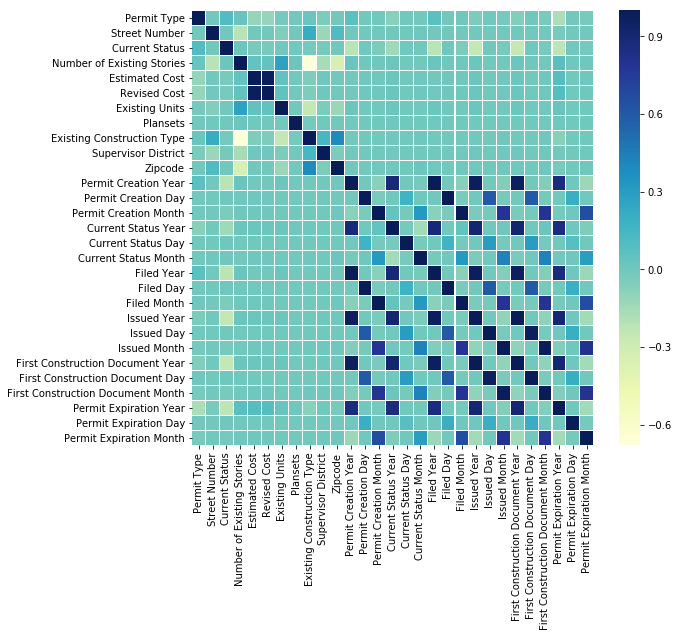

In [30]:
corrmat = clean_dataset.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

It seems the years have the biggest influence on the status, so we should take a closer look at them.

## Task C Prediction
- Predict the "Current Status" or your substitute column from B from the other columns.
- Drop unessecary columns 
- Construct one-hot encoded dummy columns 
- Choose the Predictor of your choice


Was sollen wir genau predicten? nehmen wir die bereinigten Daten? Zuvor haben wir unnötige Columns bereits rausgeworfen?



## Task D Challenges
- Describe challenges you faced during A, B and C and how you solved it.
